# **Clasificadores para separar crudos - fondos - gases**

### PCA y LDA

In [6]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
# import openpyxl
import sklearn

#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#Librerias Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [7]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento datos**


In [8]:
#Dataset 60 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_List_Comp = pd.read_csv("Data/ListaComp_appi_CRFVVG.csv",sep=",", decimal=",") #import dtframe

print(dt_List_Comp.shape)
print("#"*62)
print(dt_List_Comp.dtypes)
print("#"*62)
dt_List_Comp.head() #print dt frame

(11917, 64)
##############################################################
Formula    object
Aducto     object
S1          int64
S2          int64
S3          int64
            ...  
VG18        int64
VG19        int64
VG20        int64
VG21        int64
VG22        int64
Length: 64, dtype: object
##############################################################


,Formula,Aducto,S1,S2,S3,S4,S5,S6,S7,S8,...,VG13,VG14,VG15,VG16,VG17,VG18,VG19,VG20,VG21,VG22
0,C65H132,NaN,0,0,0,0,0,1576954,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C21H42,NaN,0,0,0,0,0,0,0,0,...,0,0,1271067,0,0,0,0,0,0,1518163
2,C26H52,NaN,0,0,0,0,0,0,0,0,...,0,1763382,1477086,0,0,0,0,0,0,1320894
3,C27H54,NaN,0,0,0,0,0,0,0,0,...,0,0,1286113,0,0,0,0,0,1478918,1239124
4,C28H56,NaN,0,0,0,0,0,1237469,0,0,...,0,0,1167206,0,0,0,0,0,2057245,1249868


In [9]:
dt_List_Comp = dt_List_Comp.drop(['Aducto'], axis=1)
dt_List_Comp = dt_List_Comp.drop(['Formula'], axis=1)
print(dt_List_Comp.shape)
dt_List_Comp.head()


(11917, 62)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,VG13,VG14,VG15,VG16,VG17,VG18,VG19,VG20,VG21,VG22
0,0,0,0,0,0,1576954,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1271067,0,0,0,0,0,0,1518163
2,0,0,0,0,0,0,0,0,0,0,...,0,1763382,1477086,0,0,0,0,0,0,1320894
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1286113,0,0,0,0,0,1478918,1239124
4,0,0,0,0,0,1237469,0,0,0,0,...,0,0,1167206,0,0,0,0,0,2057245,1249868


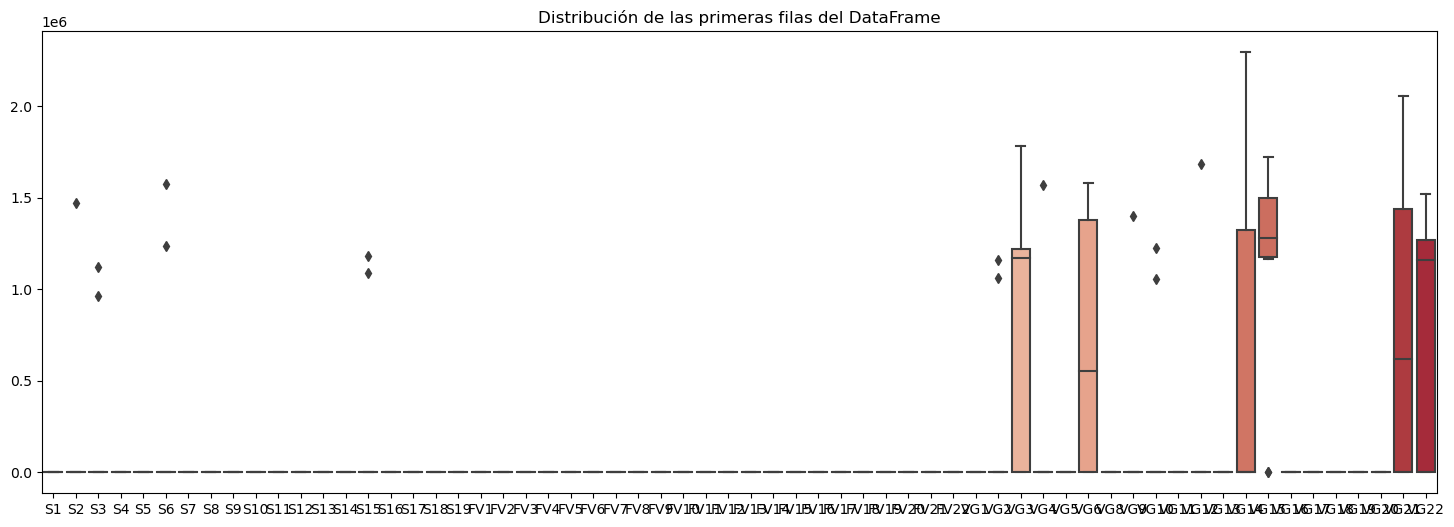

(11917, 62)


In [10]:
plt.figure(figsize=(18,6))
sns.boxplot(data=dt_List_Comp.head(10), palette="coolwarm")
plt.title('Distribución de las primeras filas del DataFrame')
plt.show()
print(dt_List_Comp.shape)

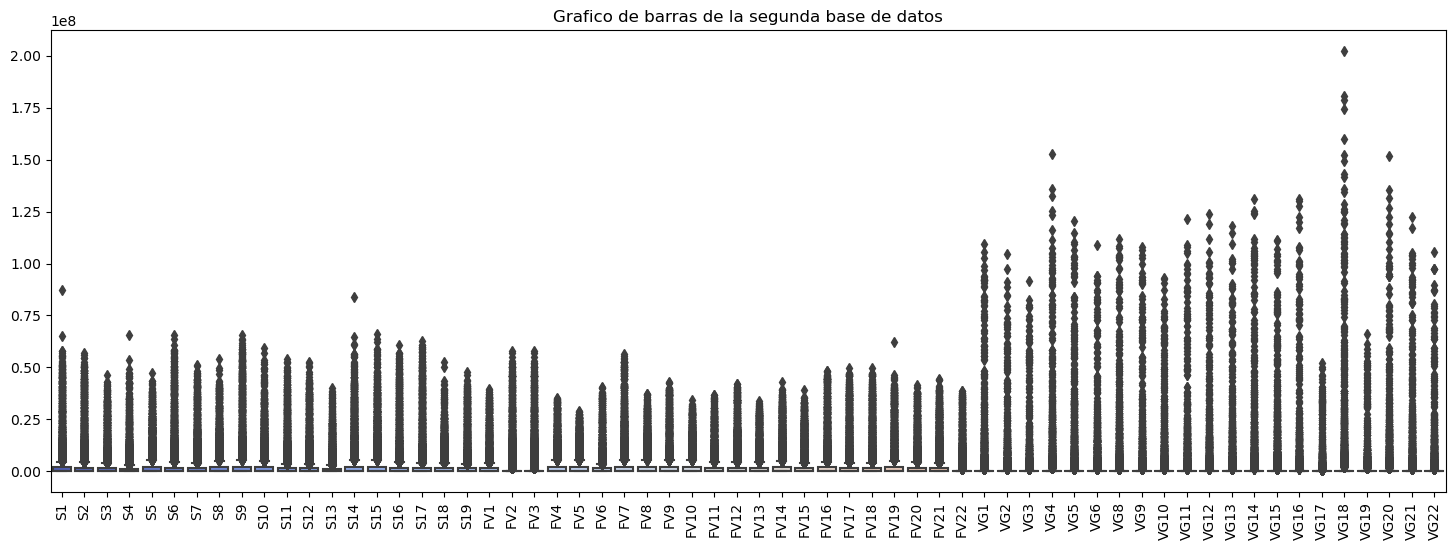

(11917, 62)


In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(data=dt_List_Comp, palette="coolwarm")
plt.title('Grafico de barras de la segunda base de datos')
plt.xticks(rotation=90)
plt.show()
print(dt_List_Comp.shape)

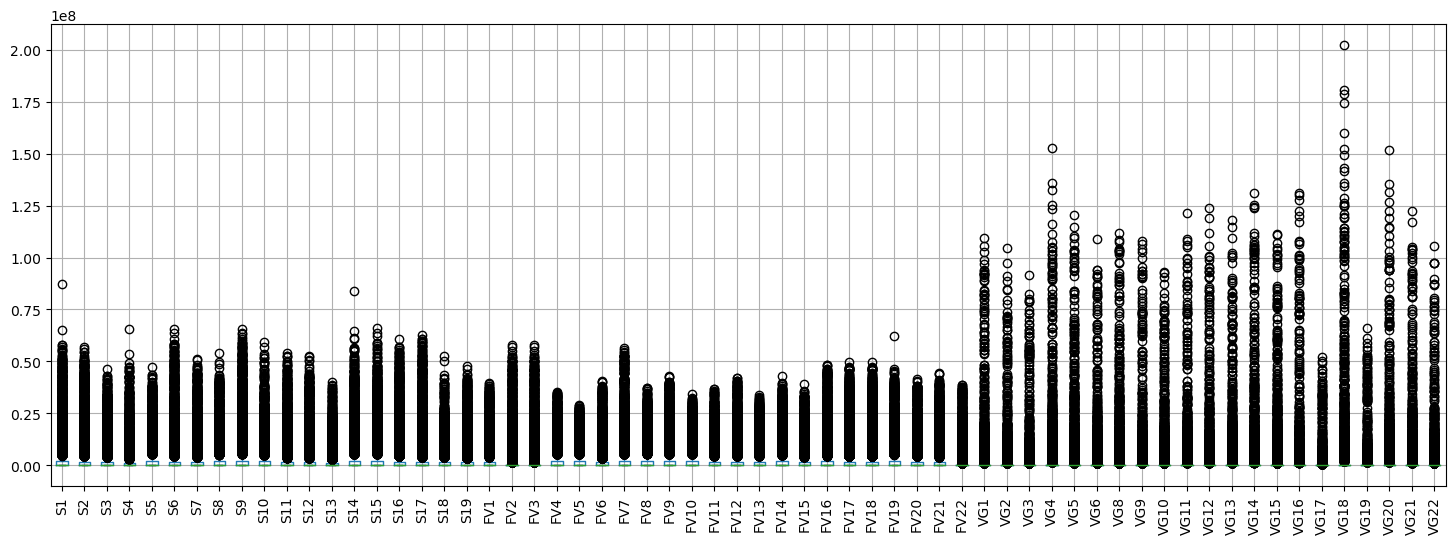

In [17]:
plt.figure(figsize=(18,6))
dt_List_Comp.boxplot()
plt.xticks(rotation=90)
plt.show()

In [5]:
#Target PCA - Clasificar como crudo 2 ,fondo 1, gas 0  
y1 = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 

In [6]:
#Dt_Supp_spect - Transpuesta valuesTranspose Valt
valt=dt_List_Comp.transpose() 
print(type(valt))
print(valt.shape)
valt


<class 'pandas.core.frame.DataFrame'>
(62, 11917)


,0,1,2,3,4,5,6,7,8,9,...,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916
S1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S2,0,0,0,0,0,1474147,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S3,0,0,0,0,0,0,0,964534,1122688,0,...,0,0,0,0,0,0,0,0,0,0
S4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S5,0,0,0,0,0,0,0,0,0,0,...,1022142,1016704,1006796,0,1422304,1250892,1362731,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VG18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VG19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VG20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VG21,0,0,0,1478918,2057245,1325341,0,1233281,1828961,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#suma de la columna de los valores Transpuestos
valSum=valt.sum(axis=1)
valorSumados=valSum.values
print(valorSumados)
print(valorSumados.shape)


[27709920977 26649944526 20443749849 16923052088 26093922970 26481957156
 22628901953 24979738420 31328978541 23714001595 20962628507 20542758797
 14237823732 29711423723 29972096574 23428067015 23742767846 18464802623
 18201974430 18845059977 22714317121 22714317121 22924153714 22946554712
 16221041411 26423698985 24803968228 23951576539 22998536929 19659327943
 22524745435 19949732355 23865321846 20008191767 23432266224 22795761716
 22795761716 23059699699 19677438724 21476862945 15012421136 10794451693
  7396664339  6897022780 12738718472 13257512826  9437473008 12408739224
  8935317716  9639836735  9389278426  9771475024 10210329980 13548587856
 12197603149  9361590561  3942183525 17005287116  4727621152 11201189387
 10566952806  7863429083]
(62,)


In [8]:
suma=valorSumados.reshape(62,1) #Reshape
valtn=valt/suma 

#dt_List_Comp - Transpuestos/SumaColumnas
valtn.head()

,0,1,2,3,4,5,6,7,8,9,...,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916
S1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
S2,0.0,0.0,0.0,0.0,0.0,0.000055,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
S3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000047,0.000055,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
S4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
S5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000039,0.000039,0.000039,0.0,0.000055,0.000048,0.000052,0.0,0.0,0.0


In [9]:
#Creacion Modelo PCA 3 componentes
pca=PCA(n_components=3) 
pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca)

(62, 3)
<class 'numpy.ndarray'>
[[-0.01041622 -0.00807829 -0.00540748]
 [-0.01162732 -0.00791715 -0.00477785]
 [-0.01050678 -0.007516   -0.0052471 ]
 [-0.0058866  -0.01011613 -0.00364551]
 [-0.01316073 -0.00858291 -0.00072663]
 [-0.01269195 -0.00749445 -0.00322936]
 [-0.0127772  -0.00793664 -0.00198902]
 [-0.01220082 -0.00895001 -0.00242259]
 [-0.01148792 -0.00813822 -0.00503544]
 [-0.00955547 -0.0083475   0.00013847]
 [-0.01030334 -0.00944546 -0.00514433]
 [-0.00955797 -0.00967362 -0.00339216]
 [-0.00664222 -0.00923333 -0.00506202]
 [-0.01229356 -0.00846127  0.00161673]
 [-0.01301151 -0.00764546  0.00105858]
 [-0.0099129  -0.00845173 -0.00674203]
 [-0.00656787 -0.00841961 -0.00971881]
 [-0.00863124 -0.00875219 -0.00076918]
 [-0.00906816 -0.0093907  -0.00745358]
 [-0.02752382  0.00571057  0.00080789]
 [-0.02854608  0.00658275  0.00132789]
 [-0.02854608  0.00658275  0.00132789]
 [-0.0262657   0.00658918  0.00249148]
 [-0.02576815  0.00535699  0.0027329 ]
 [-0.02778057  0.0078208   0.002

In [13]:
print(datos_pca.shape)
datos_pca_df = pd.DataFrame(datos_pca)
datos_pca_df.head(8)


(62, 3)


,0,1,2
0,-0.010416,-0.008078,-0.005407
1,-0.011627,-0.007917,-0.004778
2,-0.010507,-0.007516,-0.005247
3,-0.005887,-0.010116,-0.003646
4,-0.013161,-0.008583,-0.000727
5,-0.012692,-0.007494,-0.003229
6,-0.012777,-0.007937,-0.001989
7,-0.012201,-0.008950,-0.002423


In [ ]:
#Split con x=Datos PCA
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, y1, train_size   = 0.7, random_state = 1234,shuffle = True) #Split valores PCA transformados
#Split con x= valores transpuesta/suma
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(valtn, y1, train_size   = 0.7, random_state = 1234,shuffle = True) #Split Valores No transformados

print(X_tr1.shape)
print(X_tr2.shape)

## **Modelo** ML


In [ ]:
SVC1 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA = LinearDiscriminantAnalysis()

SVC1.fit(X_tr1, y_tr1)
LDA.fit(X_tr1, y_tr1)

#print(X_tr1.shape)
#print(y_tr1.shape)

In [ ]:
# Predicciones test
# ==============================================================================
predicciones1 = SVC1.predict(X_te1)
#predicciones2 = modelo1.predict(X_te1)
prediccionesLDA = LDA.predict(X_te1)


print(predicciones1)
#print(predicciones2)
print(prediccionesLDA)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generar matriz de confusión
matriz_confusion = confusion_matrix(predicciones1, prediccionesLDA)
# Plot matriz de confusión con heatmap de seaborn
plt.figure(figsize=(6,4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(prediccionesLDA), yticklabels=np.unique(prediccionesLDA))
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

plt.savefig("Graficas/ConfMatrixClasificadorCrudosFondoGas.png")


# Mostrar gráfico
plt.show()


## **Metricas**


In [14]:
#Error medio absoluto
RMAE_SVC = np.sqrt(mean_absolute_error(predicciones1, y_te1))
RMAE_LDA = np.sqrt(mean_absolute_error(prediccionesLDA, y_te1))


print(RMAE_SVC)
print(RMAE_LDA)

0.0
0.0


In [15]:
# Accuracy de test del modelo 
# ==============================================================================
accuracySVC = accuracy_score(y_te1,predicciones1,normalize = True)
accuracyLDA = accuracy_score(y_te1,prediccionesLDA,normalize = True)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA}%")


El accuracy del test SVC es: 100.0%
El accuracy del test LDA es: 100.0%


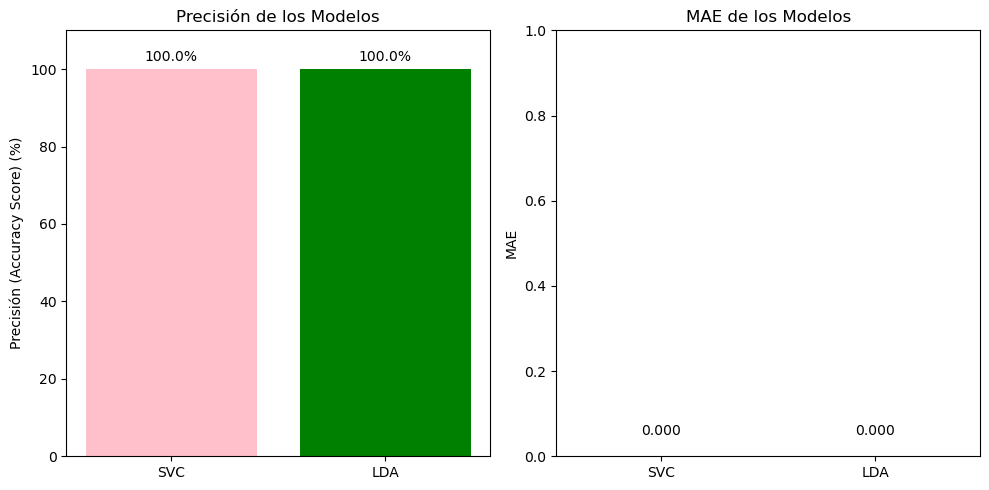

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
modelos = ['SVC', 'LDA']
accuracy = [100.0, 100.0]  # Accuracy en %
rmae = [0.0, 0.0]      # RMAE

# Gráfico de barras comparativo para accuracy
plt.figure(figsize=(10, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(modelos, accuracy, color=['pink', 'green'])
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión (Accuracy Score) (%)')
plt.ylim(0, 110)  # Limitar de 0 a 100%
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v}%", ha='center')

# Gráfico de barras comparativo para RMAE
plt.subplot(1, 2, 2)
plt.bar(modelos, rmae, color=['pink', 'green'])
plt.title('MAE de los Modelos')
plt.ylabel('MAE')
plt.ylim(0, 1)  # Limitar de 0 a 1
for i, v in enumerate(rmae):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

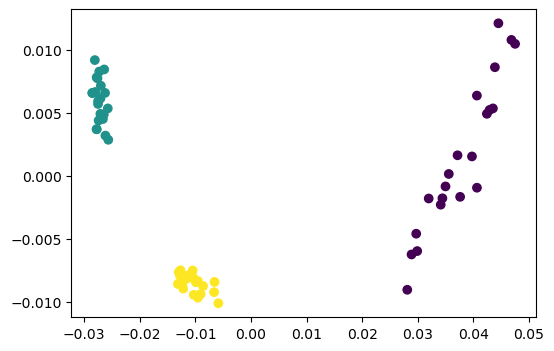

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos_pca[:, 0], datos_pca[:, 1], c=y1);

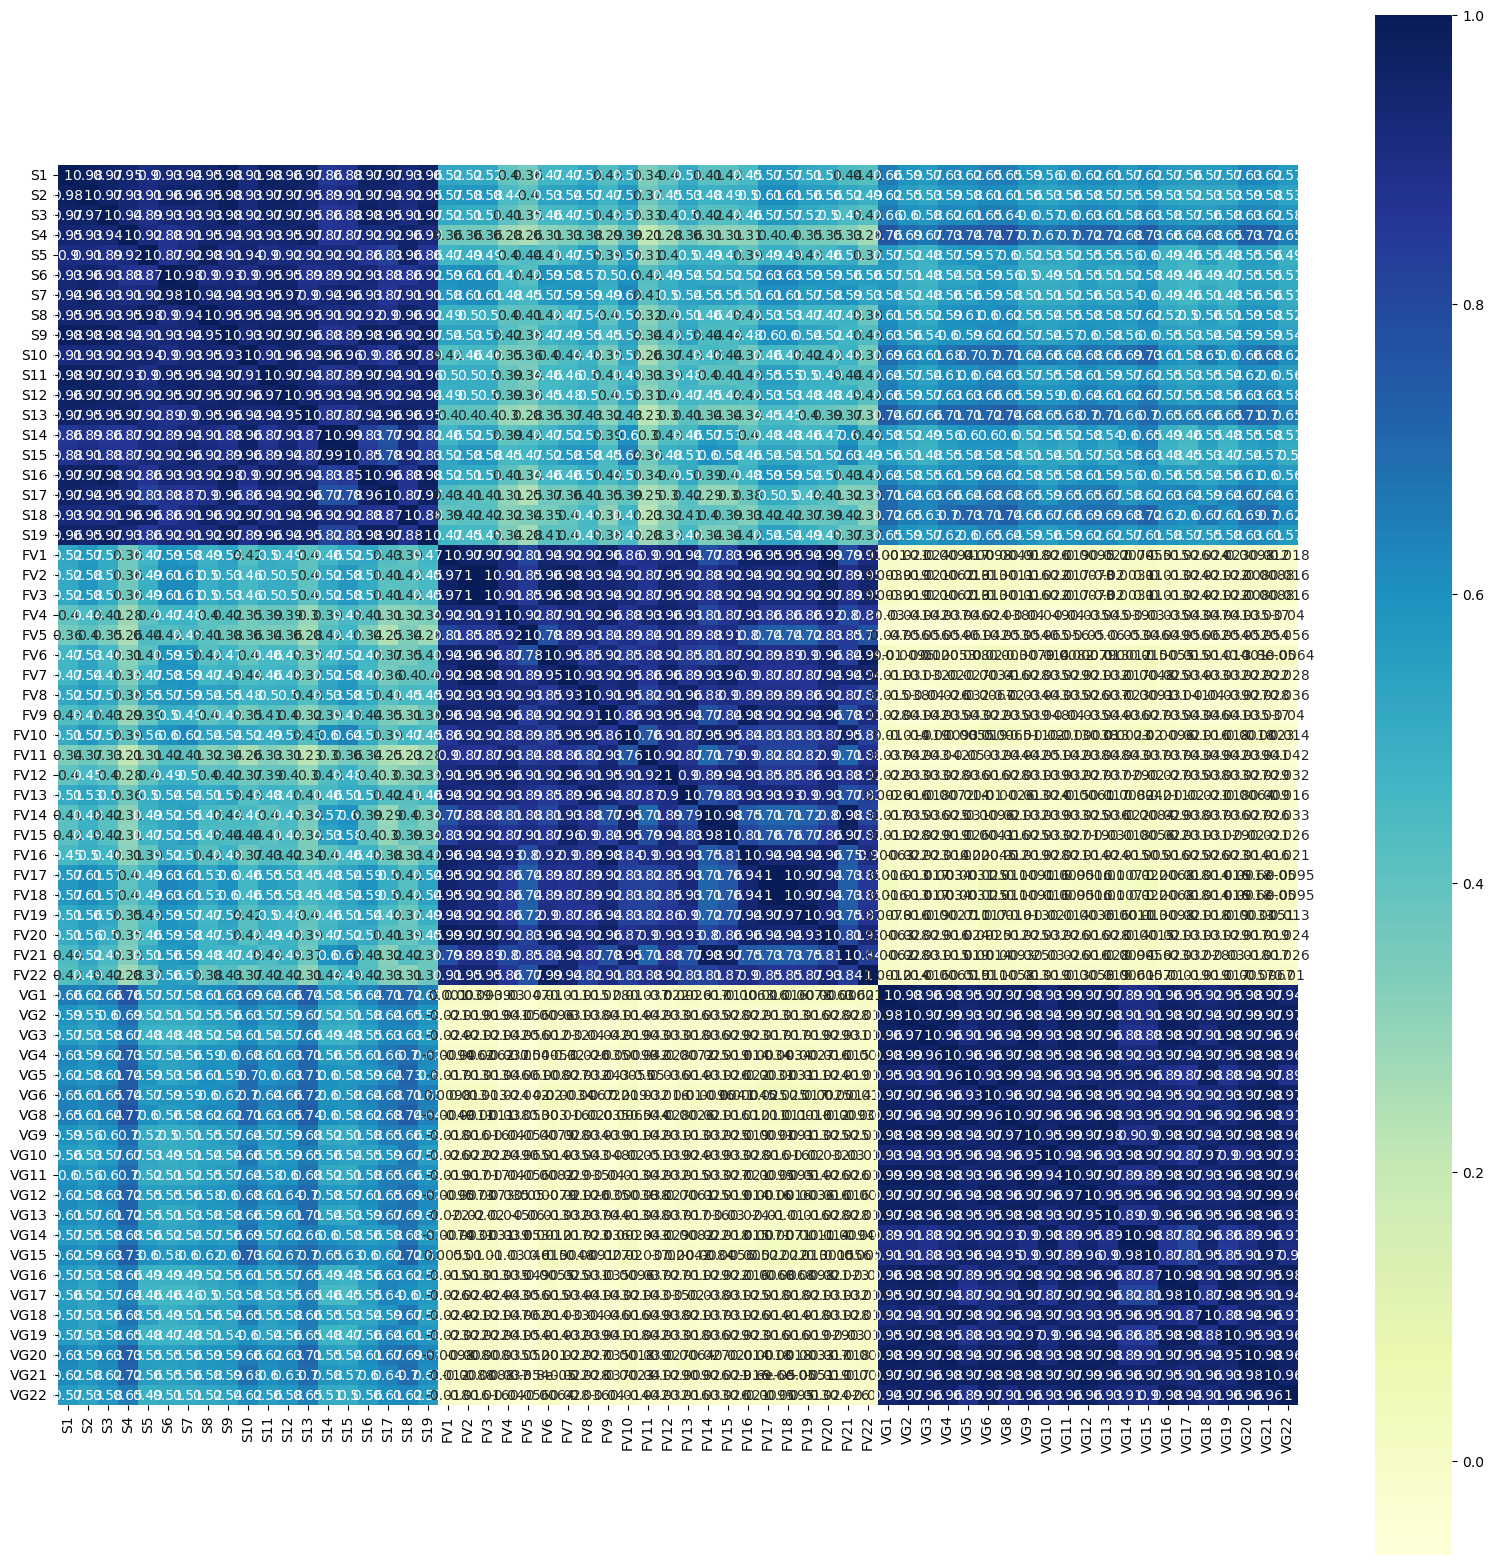

In [18]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(dt_List_Comp.corr(), square=True, annot=True, cmap="YlGnBu")
plt.savefig("Graficas/heatmapCrudosFondosGases.png") 


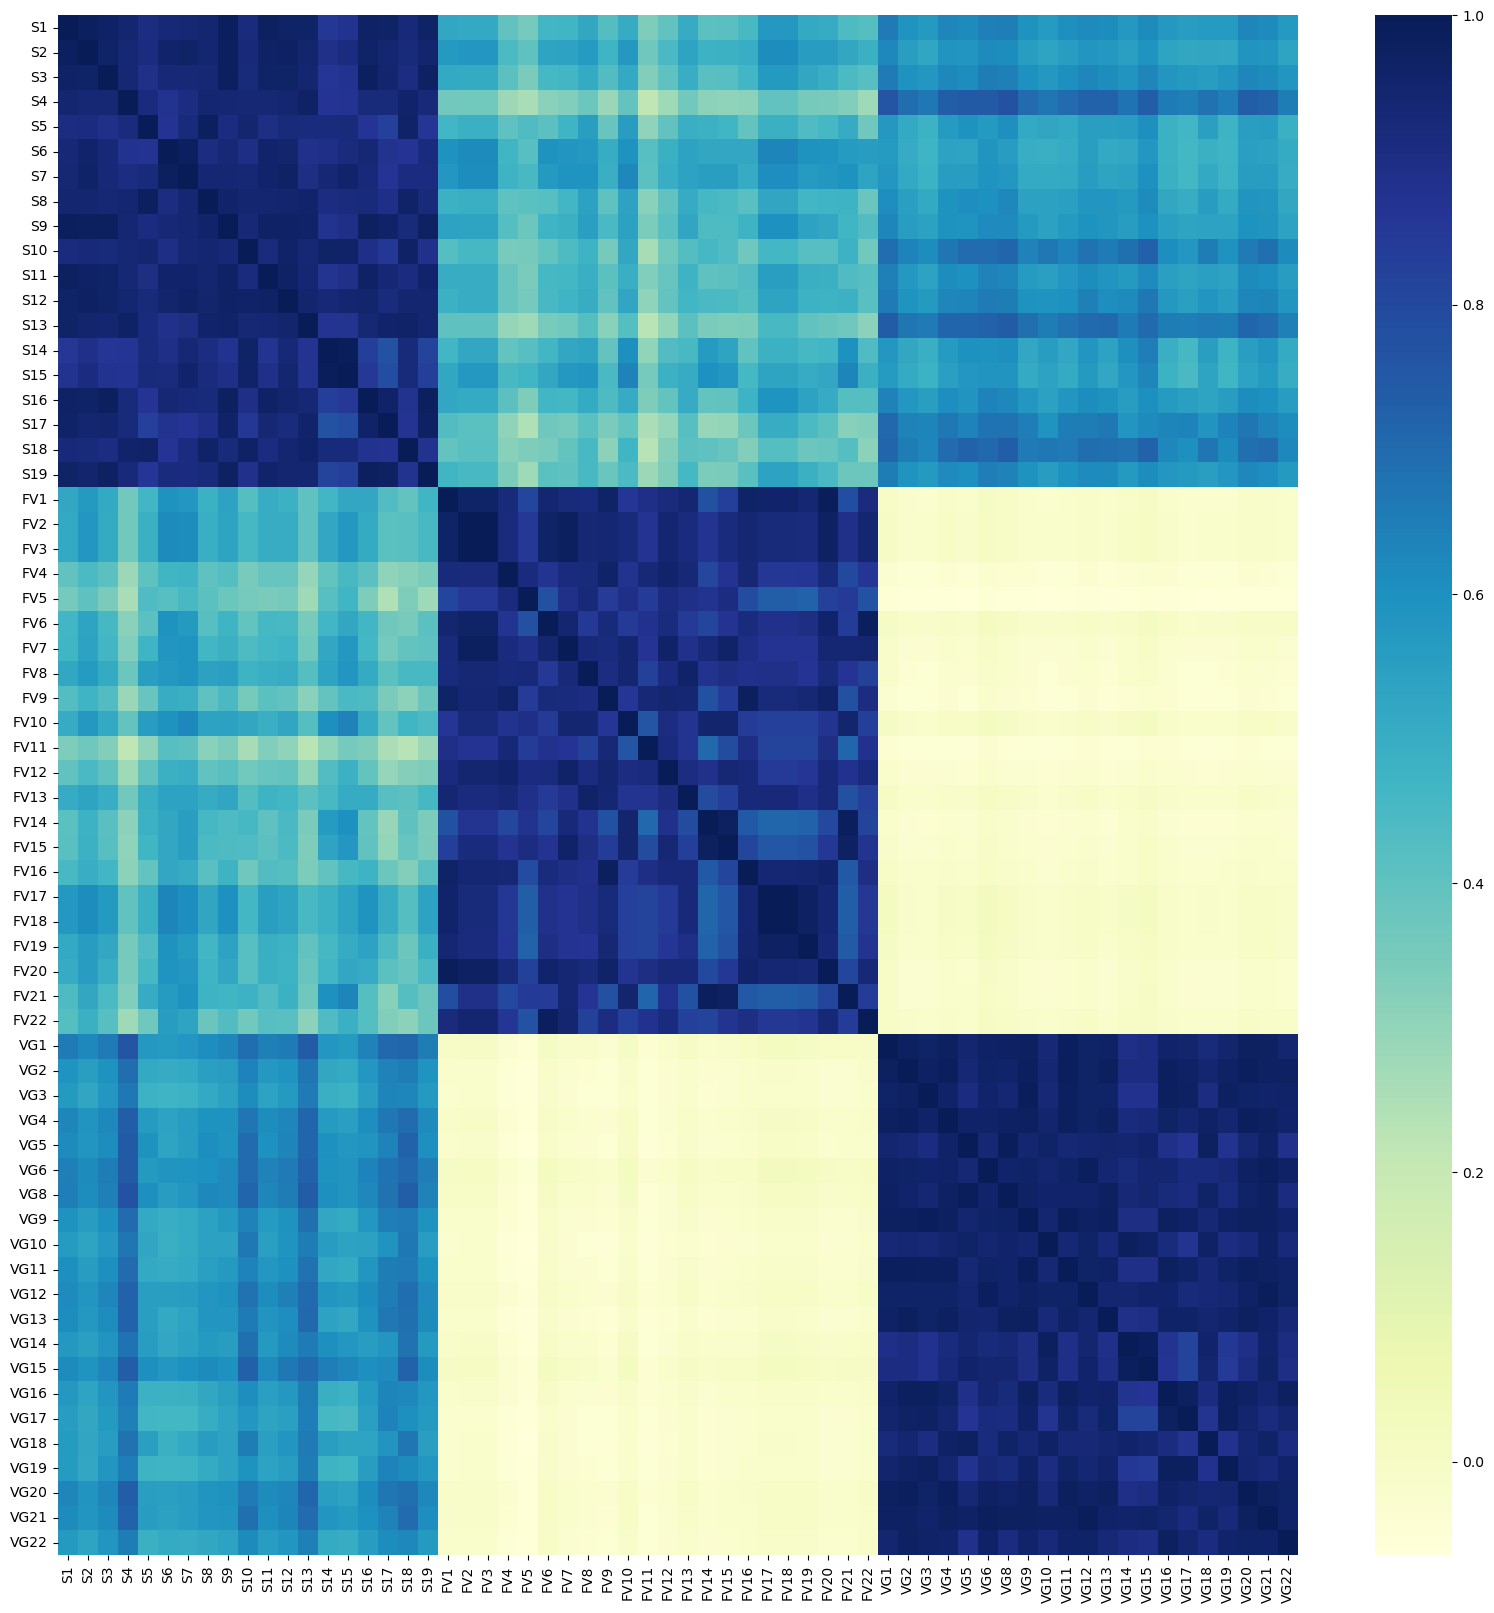

In [27]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(dt_List_Comp.corr(), cmap="YlGnBu")
plt.savefig("Graficas/heatmapCrudosFondosGases.png") 

In [25]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#21918C", "#FDE725", "#450255"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

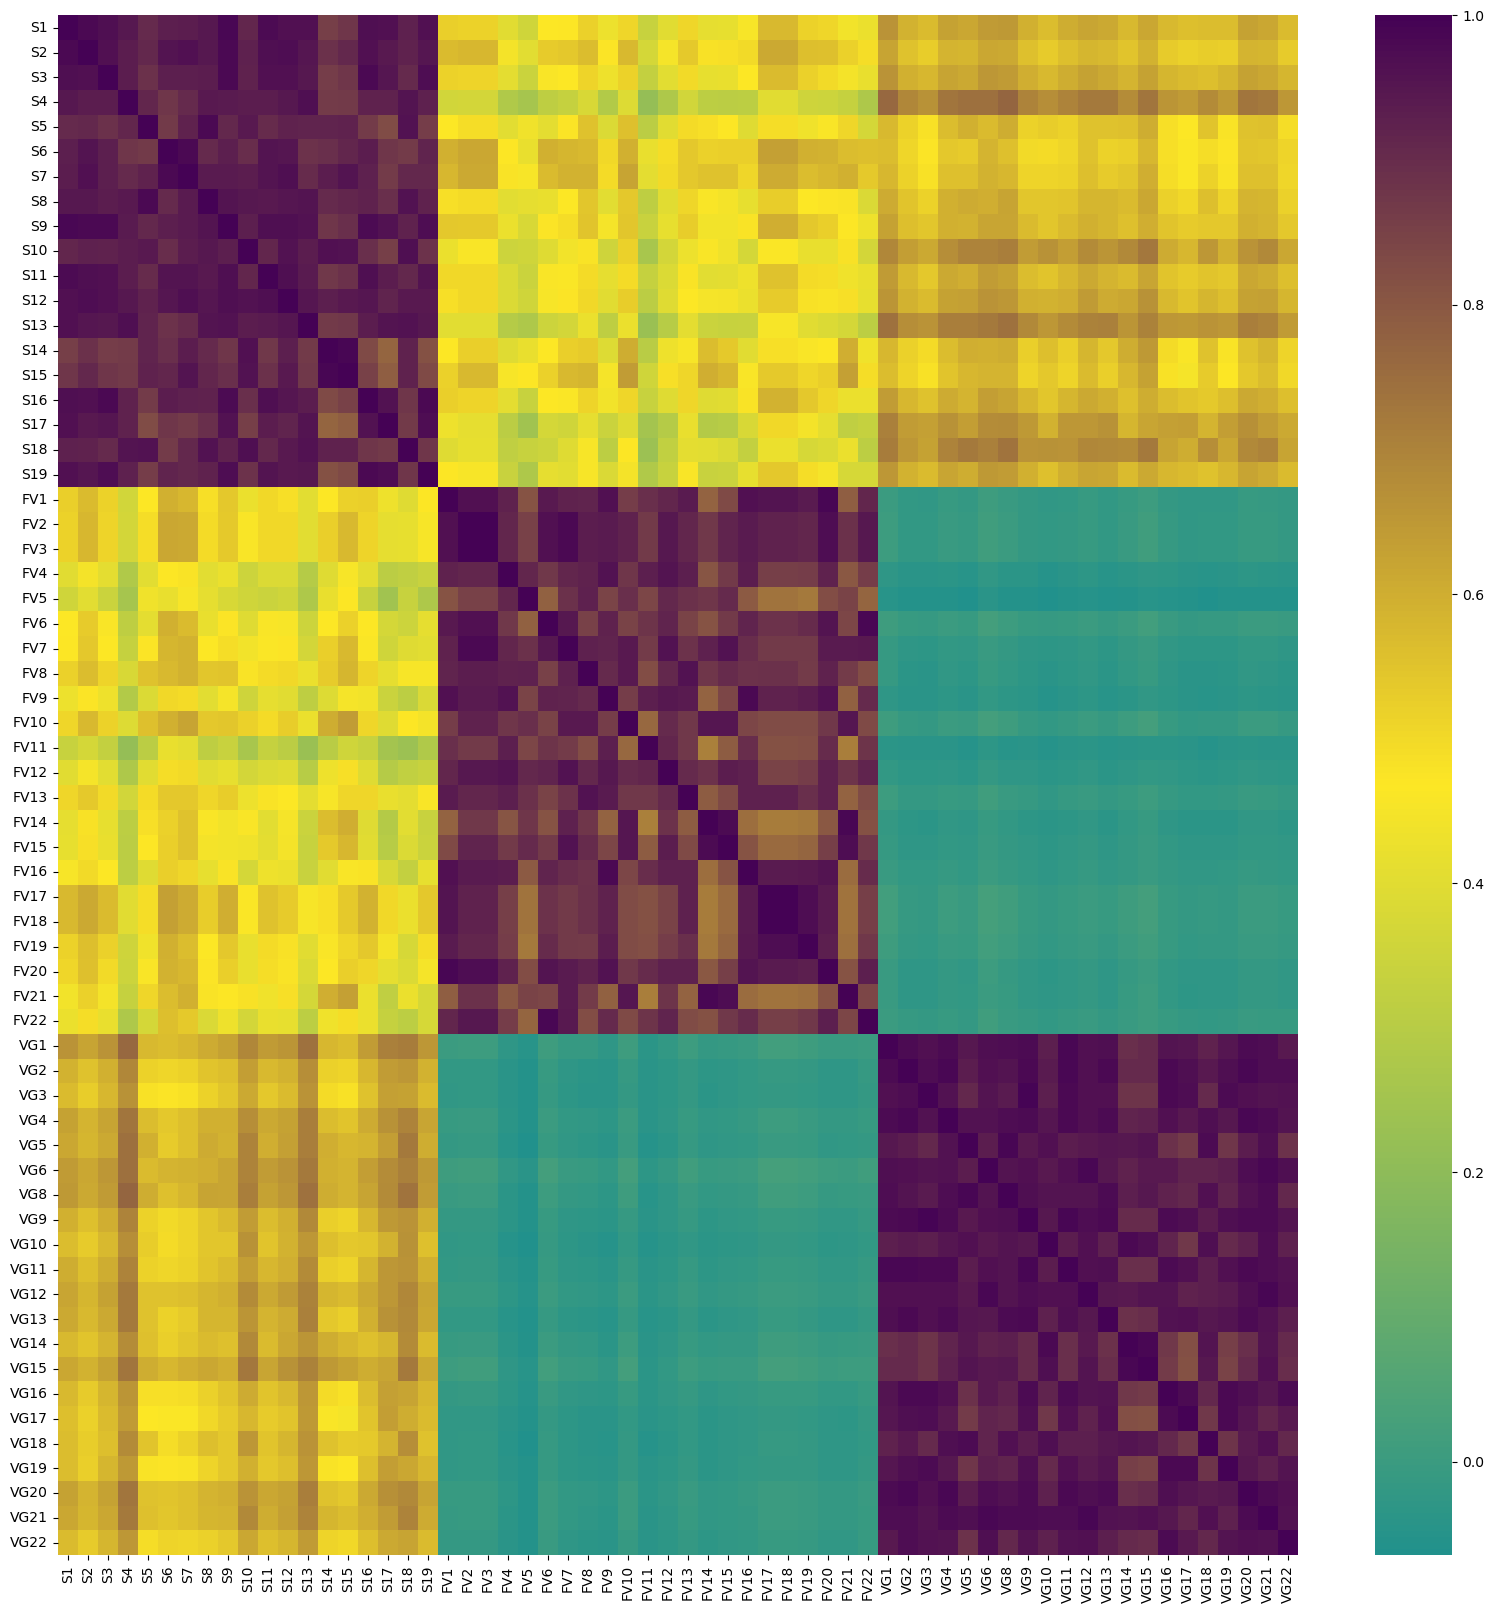

In [26]:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(dt_List_Comp.corr(), cmap=cmap)


In [19]:
from joblib import dump
dump(LDA, './modelosPKL/ModeloClasificacionCrudosFondosGasesLDA.pkl')


['./modelosPKL/ModeloClasificacionCrudosFondosGasesLDA.pkl']

In [20]:
#Descargar modelo PCA
from joblib import dump
dump(pca, './modelosPKL/modelo_pca.joblib')



['./modelosPKL/modelo_pca.joblib']